In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ddos.csv")

In [3]:
df.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0,17,985356,20,0,7242,0,401,321,362.1,...,0.000000,0.000000,0,0,0.00,0.000,0,0,1,1
1,1,17,1,2,0,802,0,401,401,401.0,...,0.000000,0.000000,0,0,0.00,0.000,0,0,1,1
2,2,17,1,2,0,2944,0,1472,1472,1472.0,...,0.000000,0.000000,0,0,0.00,0.000,0,0,1,0
3,3,17,1,2,0,458,0,229,229,229.0,...,0.000000,0.000000,0,0,0.00,0.000,0,0,1,0
4,4,6,110492576,16,2,0,0,0,0,0.0,...,29.333333,50.042648,124,1,15784628.57,7968096.509,32064666,6533626,1,1


In [4]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
X.shape

(40000, 67)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import *
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      3975
           1       0.81      0.99      0.89      4025

    accuracy                           0.88      8000
   macro avg       0.90      0.87      0.87      8000
weighted avg       0.90      0.88      0.87      8000

0.875625


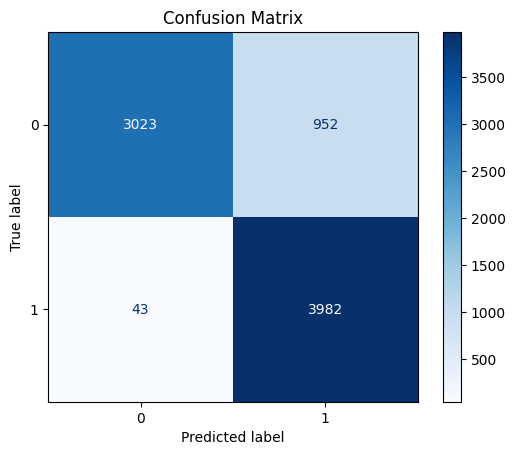

In [8]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3975
           1       0.90      1.00      0.95      4025

    accuracy                           0.94      8000
   macro avg       0.95      0.94      0.94      8000
weighted avg       0.95      0.94      0.94      8000

0.94375


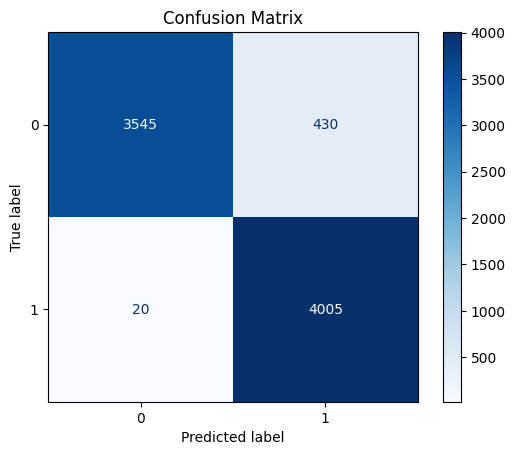

In [10]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69      3975
           1       0.68      1.00      0.81      4025

    accuracy                           0.76      8000
   macro avg       0.84      0.76      0.75      8000
weighted avg       0.84      0.76      0.75      8000

0.763875


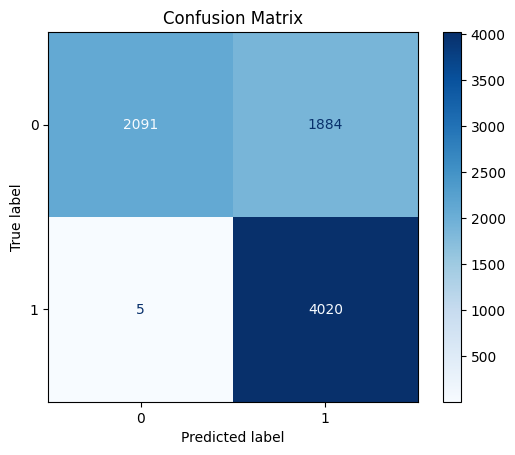

In [12]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3975
           1       0.91      0.99      0.95      4025

    accuracy                           0.94      8000
   macro avg       0.95      0.94      0.94      8000
weighted avg       0.95      0.94      0.94      8000

0.94325


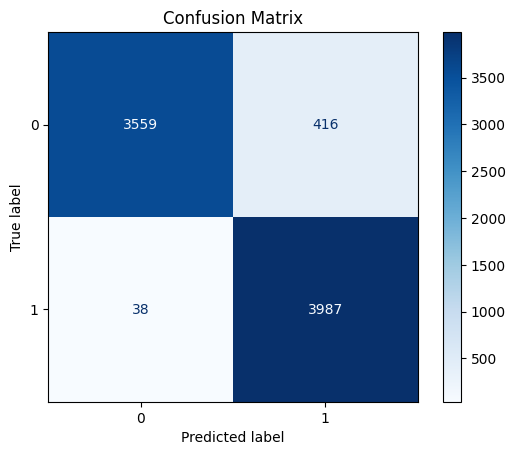

In [14]:
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [22]:
from sklearn import tree

DTClassifier = tree.DecisionTreeClassifier()
DTClassifier.fit(X_train,y_train)

print("Decision Tree Score:",DTClassifier.score(X_test,y_test))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

Decision Tree Score: 0.986875
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3486
           1       1.00      0.98      0.99      4514

    accuracy                           0.99      8000
   macro avg       0.98      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

0.985875


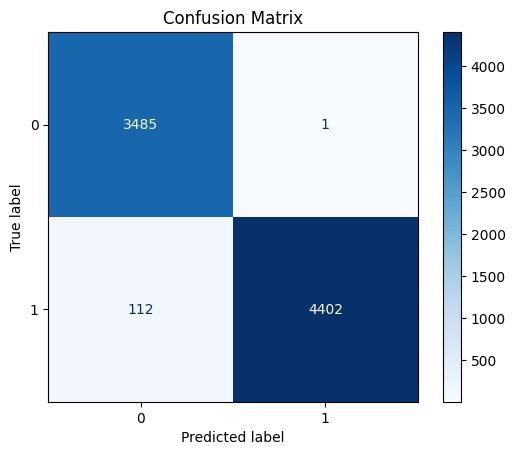

In [23]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

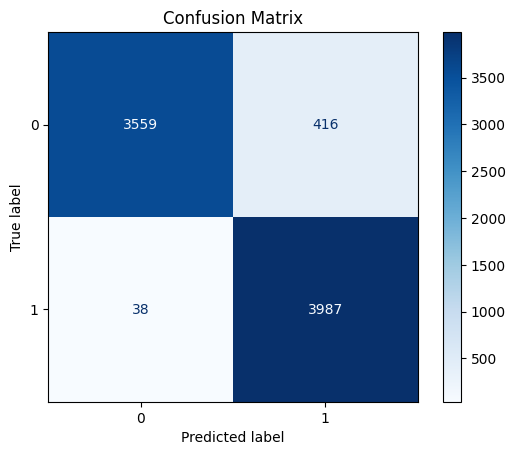

In [16]:
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
y_pred_class = [1 if i >= 0.5 else 0 for i in y_pred]
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79      3975
           1       0.74      1.00      0.85      4025

    accuracy                           0.83      8000
   macro avg       0.87      0.83      0.82      8000
weighted avg       0.87      0.83      0.82      8000

0.826625


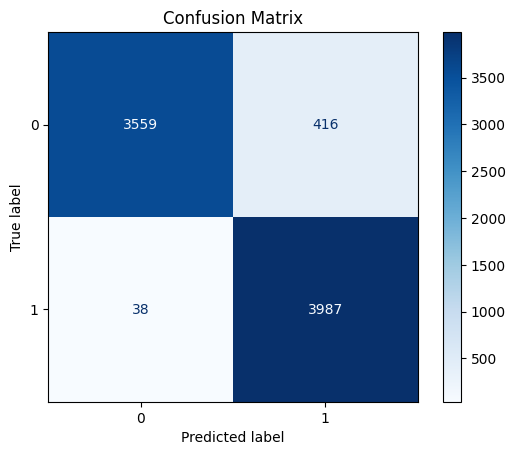

In [18]:
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_test = mlp.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3486
           1       1.00      0.98      0.99      4514

    accuracy                           0.99      8000
   macro avg       0.98      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

0.985875


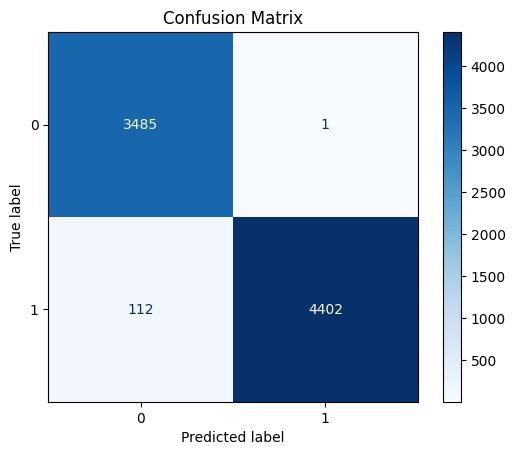

In [20]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()